In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Load the dataset
file_path = 'datasets/mini_clean_web_traffic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,1984_(roman)_fr.wikipedia.org_desktop_all-agents,421.0,438.0,351.0,259.0,329.0,383.0,361.0,333.0,327.0,...,490.0,413.0,523.0,545.0,543.0,464.0,546.0,458.0,435.0,488.0
1,24_Heures_du_Mans_fr.wikipedia.org_desktop_all...,203.0,188.0,208.0,169.0,170.0,172.0,147.0,194.0,143.0,...,126.0,130.0,131.0,130.0,135.0,114.0,99.0,155.0,88.0,98.0
2,24_Heures_du_Mans_2016_fr.wikipedia.org_deskto...,19.0,14.0,20.0,8.0,10.0,26.0,24.0,17.0,9.0,...,11.0,17.0,14.0,15.0,13.0,13.0,13.0,34.0,18.0,22.0
3,2_Broke_Girls_fr.wikipedia.org_desktop_all-agents,250.0,200.0,179.0,183.0,204.0,204.0,212.0,212.0,185.0,...,98.0,116.0,165.0,131.0,108.0,107.0,124.0,110.0,118.0,177.0
4,420_(cannabis)_fr.wikipedia.org_desktop_all-ag...,61.0,79.0,79.0,92.0,97.0,75.0,73.0,65.0,73.0,...,65.0,57.0,61.0,48.0,76.0,94.0,71.0,88.0,50.0,75.0


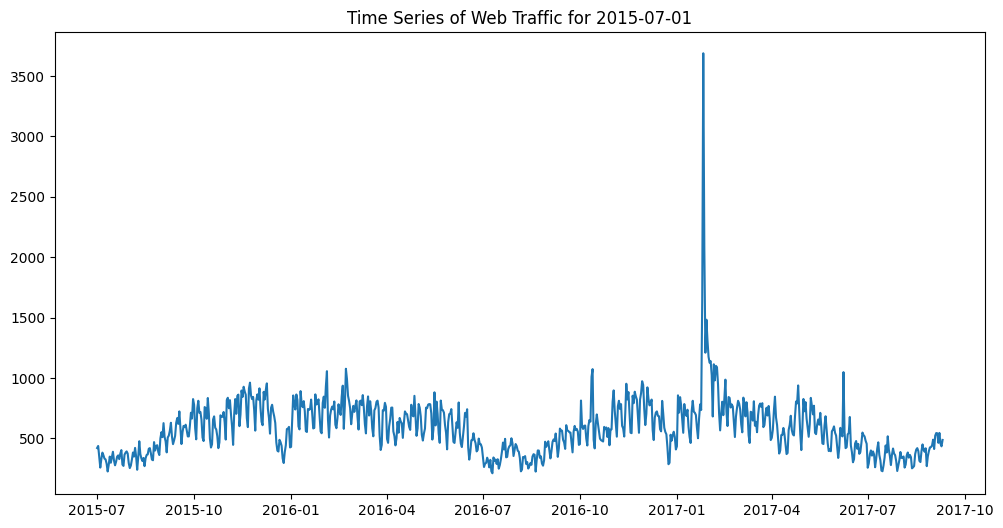

(-2.8877238051066563, 0.04679428897273802)

In [5]:
# Selecting the first page for demonstration purposes
page = data.columns[1]
ts = data.iloc[0, 1:]

# Transforming the data into a proper time series format
ts.index = pd.to_datetime(data.columns[1:])
ts.name = "Web Traffic"

# Performing a stationarity check using the Dickey-Fuller test
result = adfuller(ts.dropna())
adf_statistic, p_value = result[0], result[1]

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title(f'Time Series of Web Traffic for {page}')
plt.show()

adf_statistic, p_value

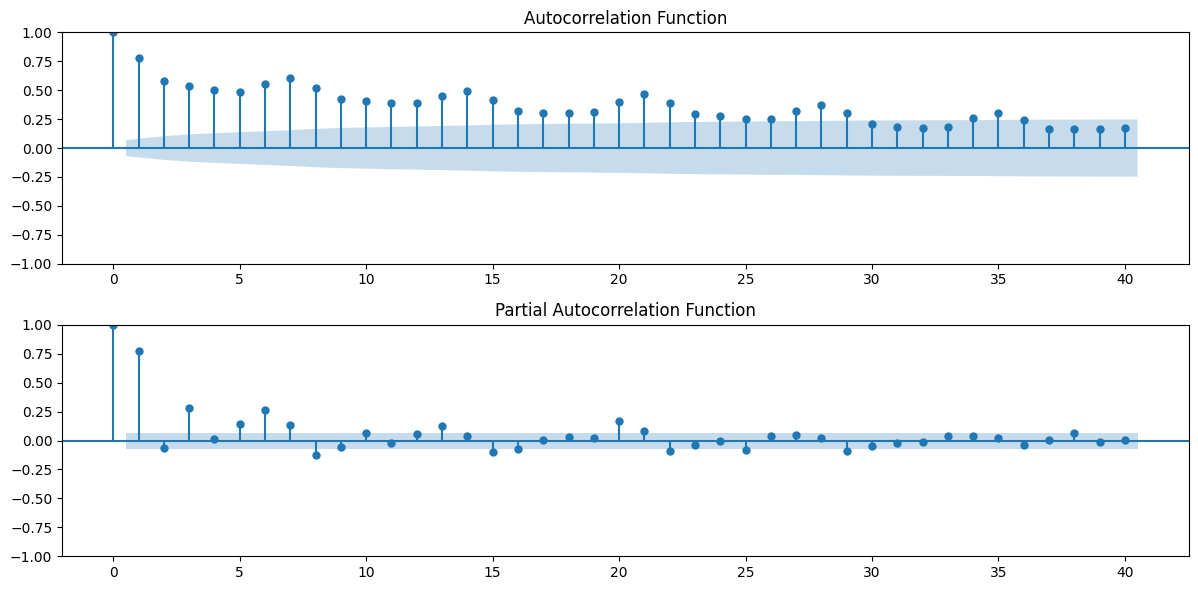

In [7]:
# Plotting ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts.dropna(), ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(ts.dropna(), ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [10]:
# Convert the time series to numeric, handling non-numeric values
ts_cleaned = pd.to_numeric(ts, errors='coerce')

# Handling missing values by forward filling
ts_cleaned.fillna(method='ffill', inplace=True)

# Re-checking for stationarity after cleaning
result = adfuller(ts_cleaned.dropna())
adf_statistic, p_value = result[0], result[1]

# Refitting the SARIMA model
model = SARIMAX(ts_cleaned, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Displaying the model summary
model_summary = results.summary()
model_summary

C:\Users\natha\AppData\Local\Temp\ipykernel_19120\3893474873.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_cleaned.fillna(method='ffill', inplace=True)
c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Web Traffic   No. Observations:                  803
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood               -5138.420
Date:                            Sun, 17 Dec 2023   AIC                          10282.840
Time:                                    00:56:27   BIC                          10296.810
Sample:                                07-01-2015   HQIC                         10288.214
                                     - 09-10-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6567      0.013     51.892      0.000       0.632       0.681
ar.S.L12      -0.5496      0.009    -59.626      0.000      -0.568      -0.531
sigma2      3.193e+04    540.835     59.046      0.000    3.09e+04     3.3e+04
===================================================================================
Ljung-Box (L1) (Q):                  18.43   Jarque-Bera (JB):             39536.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                             2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

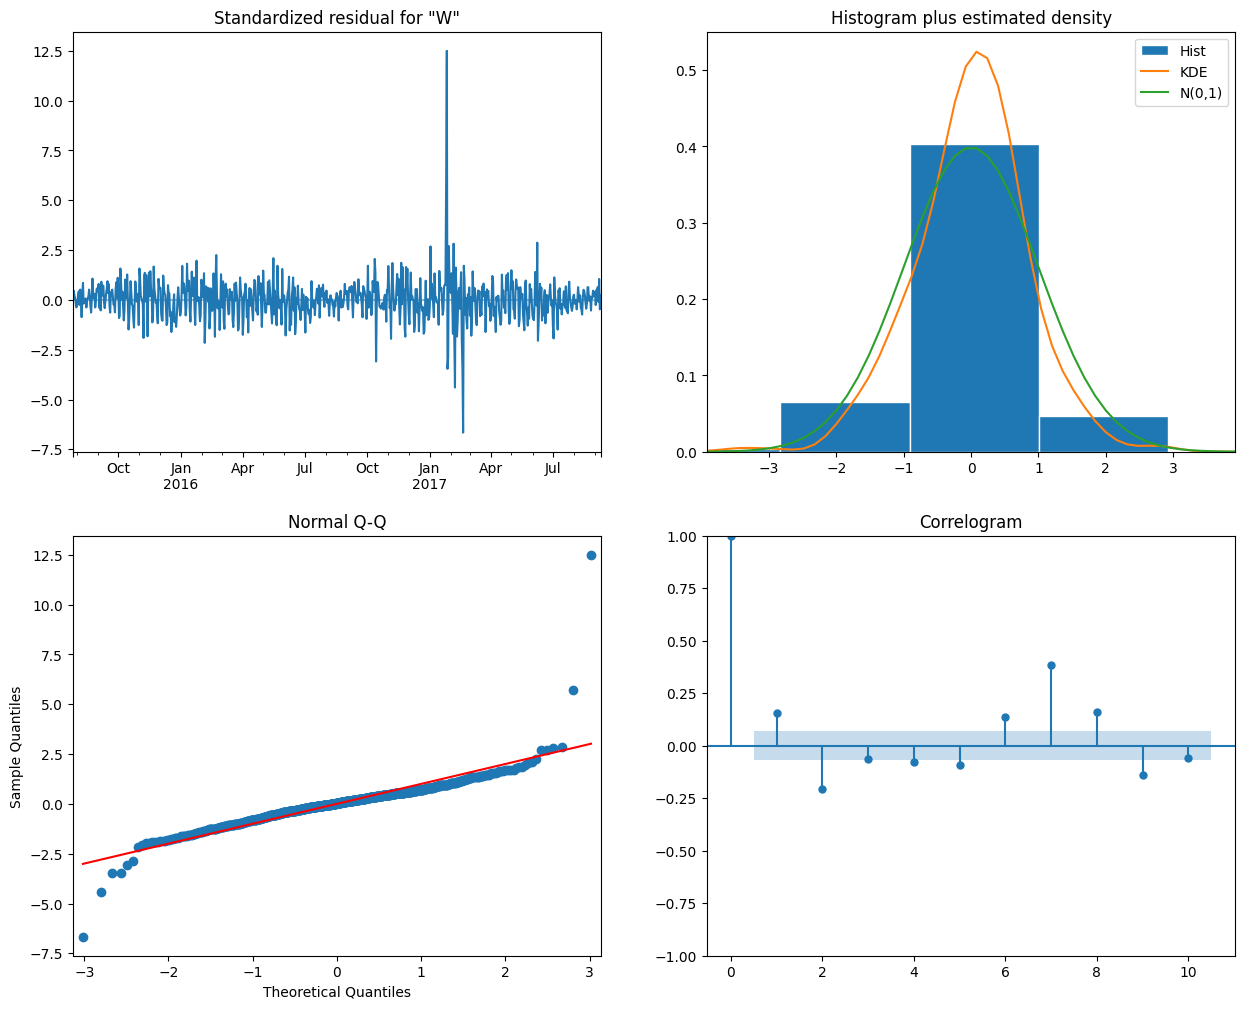

In [11]:
# Plotting model diagnostics to assess the fit
model_diagnostics = results.plot_diagnostics(figsize=(15, 12))
plt.show()

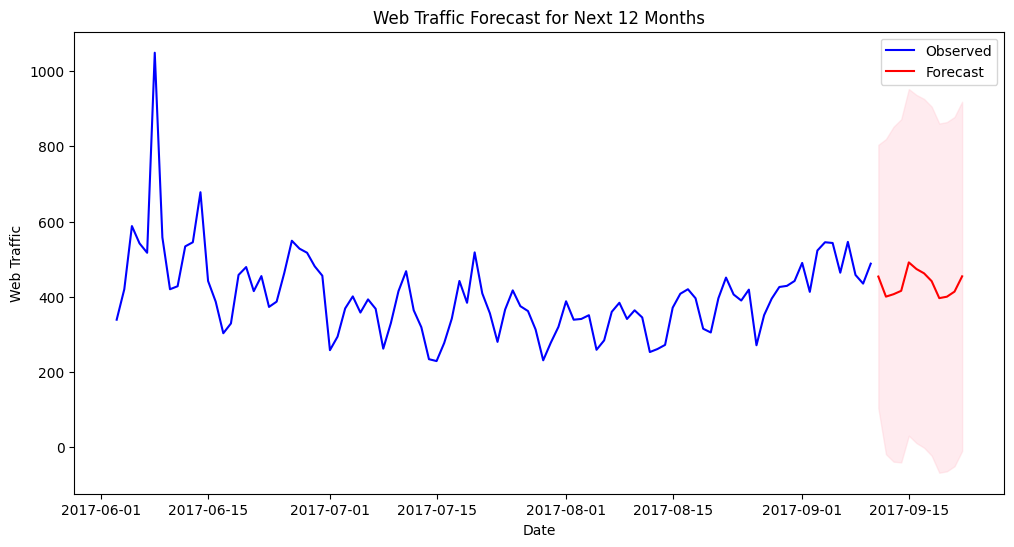

In [16]:
# Forecasting the next 12 months
forecast_period = 12
forecast = results.get_forecast(steps=forecast_period)

# Generate the forecast index starting from the day after the last date in the series
last_date = ts_cleaned.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_period + 1, freq='D')[1:]

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting the forecast alongside the actual data
plt.figure(figsize=(12, 6))
plt.plot(ts_cleaned.index[-100:], ts_cleaned[-100:], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Web Traffic Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Web Traffic')
plt.legend()
plt.show()


In [17]:
# Define the split point
split_point = -round(len(ts_cleaned) * 0.2)  # For example, last 20% of the data as the test set

# Split the data
train = ts_cleaned[:split_point]
test = ts_cleaned[split_point:]

In [18]:
model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(test, forecast_mean)
mae = mean_absolute_error(test, forecast_mean)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 54793.39964663339
Mean Absolute Error: 203.63229379476851


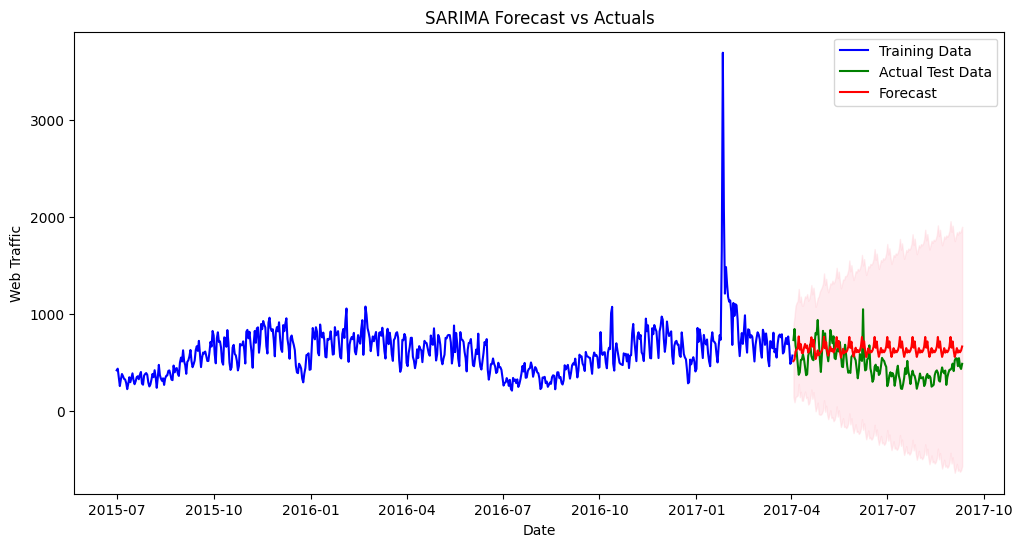

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Web Traffic')
plt.legend()
plt.show()

---

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [72]:
dataset = pd.read_csv('datasets/final_dataset.csv')

# Data Preparation
# Melting the dataset so that each row represents a single date and a single page
melted_dataset = dataset.melt(id_vars=['Page'], var_name='Date', value_name='Traffic')

# Converting 'Date' to datetime format
melted_dataset['Date'] = pd.to_datetime(melted_dataset['Date'])

# Sorting the dataset by 'Page' and 'Date'
melted_dataset.sort_values(by=['Page', 'Date'], inplace=True)

# Feature Engineering

# Extracting seasonality features
melted_dataset['DayOfWeek'] = melted_dataset['Date'].dt.dayofweek
melted_dataset['WeekOfYear'] = melted_dataset['Date'].dt.isocalendar().week
melted_dataset['Month'] = melted_dataset['Date'].dt.month

# Creating lag features for the previous 7 days
for lag in range(1, 8):
    melted_dataset[f'Lag_{lag}'] = melted_dataset.groupby('Page')['Traffic'].shift(lag)

# Rolling statistics - window of 7 days
melted_dataset['Rolling_Mean'] = melted_dataset.groupby('Page')['Traffic'].transform(lambda x: x.rolling(window=7).mean())
melted_dataset['Rolling_Median'] = melted_dataset.groupby('Page')['Traffic'].transform(lambda x: x.rolling(window=7).median())

# Dropping NaN values created by lag and rolling features
melted_dataset.dropna(inplace=True)

# Displaying the transformed dataset
melted_dataset.head()

,Page,Date,Traffic,DayOfWeek,WeekOfYear,Month,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Rolling_Mean,Rolling_Median
18626,1._April_de.wikipedia.org_desktop_all-agents,2015-07-08,46.0,2,28,7,41.0,44.0,40.0,39.0,41.0,33.0,51.0,40.571429,41.0
20991,1._April_de.wikipedia.org_desktop_all-agents,2015-07-09,21.0,3,28,7,46.0,41.0,44.0,40.0,39.0,41.0,33.0,38.857143,41.0
23356,1._April_de.wikipedia.org_desktop_all-agents,2015-07-10,29.0,4,28,7,21.0,46.0,41.0,44.0,40.0,39.0,41.0,37.142857,40.0
25721,1._April_de.wikipedia.org_desktop_all-agents,2015-07-11,34.0,5,28,7,29.0,21.0,46.0,41.0,44.0,40.0,39.0,36.428571,40.0
28086,1._April_de.wikipedia.org_desktop_all-agents,2015-07-12,39.0,6,28,7,34.0,29.0,21.0,46.0,41.0,44.0,40.0,36.285714,39.0


In [78]:
min_date = melted_dataset['Date'].min()
max_date = melted_dataset['Date'].max()

# Calculate the date range
date_range = max_date - min_date

# Determine the cutoff date (80% of the time period)
cutoff_date = min_date + pd.to_timedelta(0.8 * date_range)

# Split into training and test sets
train_set = melted_dataset[melted_dataset['Date'] < cutoff_date]
test_set = melted_dataset[melted_dataset['Date'] >= cutoff_date]

In [79]:
# Select a page that is present in both train and test sets
common_pages = set(train_set['Page']).intersection(set(test_set['Page']))
sample_page = np.random.choice(list(common_pages))

# Prepare training and testing sets for SARIMA
train = train_set[train_set['Page'] == sample_page].set_index('Date')['Traffic']
test = test_set[test_set['Page'] == sample_page].set_index('Date')['Traffic']

# Ensure the index of 'train' is a DatetimeIndex with a daily frequency
train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)

In [80]:
# Fit a SARIMA model (the order and seasonal_order need to be specified)
sarima_order = (1, 1, 1)  # Example: (AR order, Differencing order, MA order)
seasonal_order = (1, 1, 1, 12)  # Example: (Seasonal AR order, Seasonal difference, Seasonal MA, Seasonal period)
model = SARIMAX(train, order=sarima_order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
results = model.fit()

# Forecast the same number of steps as in the test set
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

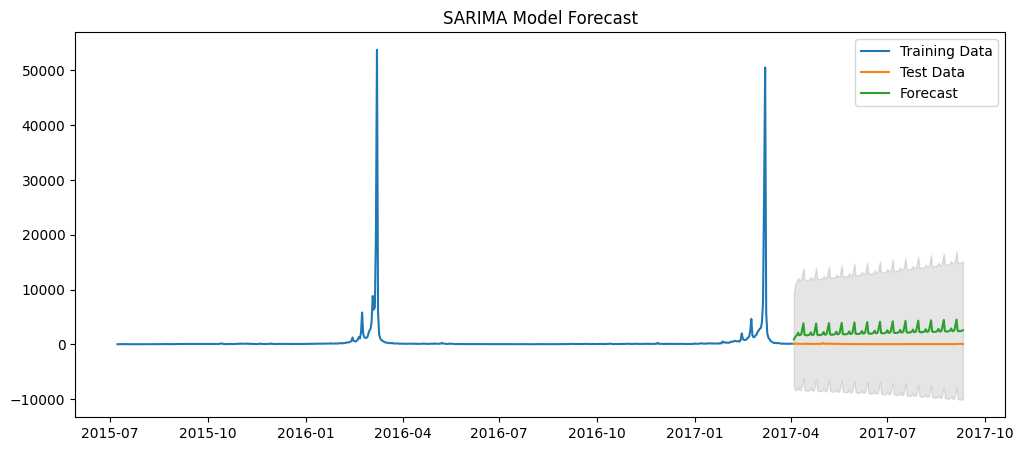

Mean Squared Error: 5745481.121493395
Mean Absolute Error: 2296.7176643952293
Root Mean Squared Error: 2396.973325152659


In [81]:
# Plot the training, test sets, and forecasts
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

# Evaluate the forecasts
mse = mean_squared_error(test, forecast_mean)
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')